In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import tensorflow_datasets as tfds

# 데이터 불러오기

In [2]:
# train, test 데이터 불러오기

train_path = './data/train.csv' # 필요에 따라 변경하세요.
# test_path = './data/test.csv' # 필요에 따라 변경하세요.
train_normal_data_path = './data/normal_raw_conversations.csv'

def load_data(file_path):
    df = pd.read_csv(file_path)
    
    return df

train_df = load_data(train_path)
# test_df = load_data(test_path)
normal_df = load_data(train_normal_data_path)

In [3]:
# 데이터 확인
train_df.shape, normal_df.shape

((3950, 3), (2023, 3))

In [4]:
train_df.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [5]:
normal_df.head()

,class,conversation,class_encoded
0,일반 대화,언니 명랑 핫도그 먹어 봤어?\n웅 먹은 지 한참 됐어\n나 오늘 먹었는데 진짜 존...,4
1,일반 대화,"언니 지금 자취하고 있어?\n웅 자취비 장난 아님\n키키 맞아,\n나도 지금 서울살...",4
2,일반 대화,언니는 차 멀미 안 해?\n나 멀미는 없더라\n너 있어?\n나 진짜 장난 아니야\n...,4
3,일반 대화,언니 지금 회사에서 어떤 일 하고 있어?\n나 코디하자나\n스트레스 장난 아님\n와...,4
4,일반 대화,언니 남동생이나 오빠 있엉?\n아니\n나 외동 키키 왜?\n나는 언니 한 명 있는데...,4


In [6]:
normal_df = normal_df[['class', 'conversation']]
normal_df.head()

,class,conversation
0,일반 대화,언니 명랑 핫도그 먹어 봤어?\n웅 먹은 지 한참 됐어\n나 오늘 먹었는데 진짜 존...
1,일반 대화,"언니 지금 자취하고 있어?\n웅 자취비 장난 아님\n키키 맞아,\n나도 지금 서울살..."
2,일반 대화,언니는 차 멀미 안 해?\n나 멀미는 없더라\n너 있어?\n나 진짜 장난 아니야\n...
3,일반 대화,언니 지금 회사에서 어떤 일 하고 있어?\n나 코디하자나\n스트레스 장난 아님\n와...
4,일반 대화,언니 남동생이나 오빠 있엉?\n아니\n나 외동 키키 왜?\n나는 언니 한 명 있는데...


In [7]:
# train data 와 normal 데이터 합치기
def concat_train_normal(df_list):
    train_df = pd.concat(df_list, ignore_index=True)
#     train_df.drop(['idx'], axis=1, inplace=True)
    train_df.reset_index(inplace=True)

    return train_df

In [8]:
train_df = concat_train_normal([train_df, normal_df])
train_df.head()

,index,idx,class,conversation
0,0,0.0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,1.0,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,2.0,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,3.0,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,4.0,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [9]:
train_df.tail()

,index,idx,class,conversation
5968,5968,NaN,일반 대화,미국은 백신 6-11세 권고한대\n헐 어린애들 우찌되면 어떻게\n아니\n애기들이 맞...
5969,5969,NaN,일반 대화,우리는 항상 다이어트 중!\n맞아\n1년 동안 계속\n키키 다이어트 여친도 매년.....
5970,5970,NaN,일반 대화,치아 보험 들어야 하나\n치아 보험 애매하당\n치아 보험은 뭔가 ㅠㅠ\n오빠는 벌써...
5971,5971,NaN,일반 대화,당근에는 없는 게 없어...\n맞아\n아주 용이해 하하\n당근 들어가면... 뭐든 ...
5972,5972,NaN,일반 대화,오빠 야구 중계 좀\n지금 현재 8회말 1–0\n키키 지금 어떻게 되고 있나여 키키...


In [10]:
train_df.shape

(5973, 4)

In [11]:
train_df = train_df.drop_duplicates(subset=['conversation'])
train_df.shape

(5869, 4)

In [12]:
train_df = train_df.sample(frac=1, random_state=None).reset_index(drop=True)
train_df.head()

,index,idx,class,conversation
0,942,942.0,직장 내 괴롭힘 대화,대리님 혹시 00 자료 보내주실 수 있을까요? 자료가 부족해서요\n 네? 나 알맞게...
1,2132,2132.0,갈취 대화,야 이 새끼들아 빨리 일 안하고 뭐해\n또왔다 저 악마놈들\n임금을 확 안줘버릴거다...
2,1147,1147.0,기타 괴롭힘 대화,너참못생겼다\n미안해\n미안한짓을 왜해\n.\n열받으니 10대만 맞자\n아퍼 그만해...
3,3571,3571.0,갈취 대화,여보세요 별이부모님이신가요?\n네 그런데요\n별이가 교통사고가 나서 의식이 없어요\...
4,5413,NaN,일반 대화,우리 같이 메이플 스토리하자\n메이플스토리는 정말 재미가 없어\n난 메이플스토리에 ...


In [13]:
val_df = train_df.iloc[:5869//10, ]
test_df = train_df.iloc[5869//10:5869//10*2, ]
train_df = train_df.iloc[5869//10*2:, ]
train_df.shape, val_df.shape, test_df.shape

((4697, 4), (586, 4), (586, 4))

In [14]:
# train, test 데이터 불러오기
train_path1 = './augment data/augmented_inserted_text_data.csv' # 필요에 따라 변경하세요.
# train_path2 = './augment data/augmented_replaced_text_data.csv' # 필요에 따라 변경하세요.
# train_path3 = './augment data/raw_data.csv' # 필요에 따라 변경하세요.
test_path = './data/test.csv' # 필요에 따라 변경하세요.

def load_data(file_path):
    df = pd.read_csv(file_path)
    
    return df

train_df1 = load_data(train_path1)
# train_df2 = load_data(train_path2)
# train_df3 = load_data(train_path3)
# test_df = load_data(test_path)
# normal_df = load_data(train_normal_data_path)

In [15]:
train_df1 = train_df1[~(train_df1['class_encoded']==4)]
train_df1.tail()

,class,class_encoded,conversation
3841,기타 괴롭힘 대화,3,""" 준하야 넌 대가리가 왜이렇게 크냐? 내 머리가 뭐. 밥먹으면 대가리만 크냐 너는..."
3842,갈취 대화,1,내가 지금 너 아들 김길준을 데리고 있어. 살리고 싶으면 계좌에 1억만 더 더 보내...
3843,직장 내 괴롭힘 대화,2,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 또 그렇게 저렇게 살지. 너 왜 그...
3844,갈취 대화,1,누구맘대로 여기서 장사하래? 이게 무슨일입니까? 남의 구역에서 장사하려면 자릿세를 ...
3845,직장 내 괴롭힘 대화,2,희정씨. 네 네? 주말에 시간이 넘쳐나나봐 갑자기 왜그러세요? 손이 빤짝빤짝 네일했...


In [16]:
train_df = concat_train_normal([train_df, train_df1])
train_df.shape, train_df.head()

((8543, 6),
    level_0   index     idx        class  \
 0        0  2031.0  2031.0  직장 내 괴롭힘 대화   
 1        1   359.0   359.0    기타 괴롭힘 대화   
 2        2  2906.0  2906.0        협박 대화   
 3        3  5503.0     NaN        일반 대화   
 4        4  4027.0     NaN        일반 대화   
 
                                         conversation  class_encoded  
 0  안대리 이런식으로 일할거야?\n네 무슨 일이시죠?\n내가 말한 계획안 하고 있는거야...            NaN  
 1  애들아 내일 내 생일파티하는데 놀러와 근데 한테는 비밀이야 나 걔 엄마 없어서 싫거...            NaN  
 2  어제까지 완료 하기로 했던 일은 다 완료 되었나요?\n어제 급한 일이 있어서 처리를...            NaN  
 3  요즘 자동차 진짜 신기하더라\n자동차 어떤 게 신기해 키키\n그나저나 이제 자차 출...            NaN  
 4  오빠 마피아 게임 해봤어?\n응 예전에 고개 숙이고 친구들이랑 했었지\n키키 그거 ...            NaN  )

In [17]:
train_df = train_df[['conversation', 'class']]
val_df = val_df[['conversation', 'class']]
test_df = test_df[['conversation', 'class']]

train_df.shape, val_df.shape, test_df.shape

((8543, 2), (586, 2), (586, 2))

In [18]:
# 클래스 숫자로 변환
def class_encoding(train_df, class_mapping):
    train_df['class_encoded'] = train_df['class'].replace(class_mapping)
    
    return train_df

# 클래스 매핑 딕셔너리 정의
class_mapping = {
    "협박 대화": 0,
    "갈취 대화": 1,
    "직장 내 괴롭힘 대화": 2,
    "기타 괴롭힘 대화": 3,
    "일반 대화": 4
}

train_df = class_encoding(train_df, class_mapping)
val_df = class_encoding(val_df, class_mapping)
test_df = class_encoding(test_df, class_mapping)

# 변환된 데이터 확인
train_df.shape, val_df.shape, test_df.shape

((8543, 3), (586, 3), (586, 3))

In [19]:
train_df.head(10)

,conversation,class,class_encoded
0,안대리 이런식으로 일할거야?\n네 무슨 일이시죠?\n내가 말한 계획안 하고 있는거야...,직장 내 괴롭힘 대화,2
1,애들아 내일 내 생일파티하는데 놀러와 근데 한테는 비밀이야 나 걔 엄마 없어서 싫거...,기타 괴롭힘 대화,3
2,어제까지 완료 하기로 했던 일은 다 완료 되었나요?\n어제 급한 일이 있어서 처리를...,협박 대화,0
3,요즘 자동차 진짜 신기하더라\n자동차 어떤 게 신기해 키키\n그나저나 이제 자차 출...,일반 대화,4
4,오빠 마피아 게임 해봤어?\n응 예전에 고개 숙이고 친구들이랑 했었지\n키키 그거 ...,일반 대화,4
5,홈쇼핑은 참 대단한 듯\n이번에 직구로 노트북 샀다\n키키 맞아\n진짜 사고 싶음\...,일반 대화,4
6,저녁 식사 했쥬? 하하\n응 먹었지 하하 **은?\n나 오늘 부대찌개 먹었엉 키키\...,일반 대화,4
7,나 남친이랑 다담주 제주도 간다!\n우리 더블로 여행 같이 가자\n응...? 더블 ...,일반 대화,4
8,차 사고 싶다...\n차한대 사자 그럼 하하\n저도 차... 사주세요\n나도 전기차...,일반 대화,4
9,상진아 형이 이번에 부업 하나 하려고 하는데 좀 도와줄래?\n어떤일인데요? 형?\n...,기타 괴롭힘 대화,3


In [20]:
val_df.head(10)

,conversation,class,class_encoded
0,대리님 혹시 00 자료 보내주실 수 있을까요? 자료가 부족해서요\n 네? 나 알맞게...,직장 내 괴롭힘 대화,2
1,야 이 새끼들아 빨리 일 안하고 뭐해\n또왔다 저 악마놈들\n임금을 확 안줘버릴거다...,갈취 대화,1
2,너참못생겼다\n미안해\n미안한짓을 왜해\n.\n열받으니 10대만 맞자\n아퍼 그만해...,기타 괴롭힘 대화,3
3,여보세요 별이부모님이신가요?\n네 그런데요\n별이가 교통사고가 나서 의식이 없어요\...,갈취 대화,1
4,우리 같이 메이플 스토리하자\n메이플스토리는 정말 재미가 없어\n난 메이플스토리에 ...,일반 대화,4
5,별이씨 주말에 미안한데 어제 회의한거 보고서로 써 줄수 있죠?\n넵월요일 오후에 제...,직장 내 괴롭힘 대화,2
6,**이는 오늘 저녁 뭐 먹었어?\n우린 치킨 먹었당 하하\n저녁 긱사밥 먹었는데 완...,일반 대화,4
7,"연애하면서 가장 기억에 남는 사람 있어?\n음 나 한 명 있긴 해 키키\n음, 난 ...",일반 대화,4
8,그럼 2억짜리로 이사 가서 1. 5억 남기자\n그런 곳이 어디 있는데 키키\n난 마...,일반 대화,4
9,우리집 냥냥이 아픈 거 얘기했나?\n응 저번에 얘기 해줬던 거 같아!\n근데 이게 ...,일반 대화,4


In [21]:
test_df.head(10)

,conversation,class,class_encoded
586,오늘 출근할 때 타고 갈 거임?\n알바 열심히 하면 캐스퍼 살 수 있나요?\n일단....,일반 대화,4
587,우리 사귀자\n아 나는 이미 좋아하는 사람이있어\n그사람은 너 안좋아하는거아니야?\...,기타 괴롭힘 대화,3
588,팀장님 저 다음주 금요일날 연가를 쓰려합니다.\n다음주 금요일? 뭐 때문에 쉬는데?...,직장 내 괴롭힘 대화,2
589,** 아침은 먹은 거임?\n아침은 바나나 먹는다 키키\n그러게\n아침 먹고 출근하니...,일반 대화,4
590,아! 사장님! 음식에서 이물질이 니왔어요?\n네? 그럴리가 없는데\n아니 사과는 못...,갈취 대화,1
591,그.러.지.마 돌려줘\n뭘 돌.려.줘\n내.말.따.라.하.지.마\n그럼 말을 똑바로...,기타 괴롭힘 대화,3
592,너 내 지갑에 손댔지? 내 돈 내놔.\n 아니에요.\n 봐봐. 돈 여기 있잖아. 속...,협박 대화,0
593,진봉이는 애견 카페 가는 거 좋아해?\n진봉이는 나가는 걸 좋아해 키키\n아 진짜?...,일반 대화,4
594,일본이 게임을 잘 만드나?\n응 에법 잘 만들지 하하\n일본은 애니 잘 만들지 않아...,일반 대화,4
595,저기요 제가 내일 중요한 시험이 있어서 집중 좀 하게 조용히 해주세요.\n싫은데요?...,협박 대화,0


In [22]:
train_df = train_df.drop_duplicates(subset=['conversation'])
train_df = train_df.sample(frac=1, random_state=None).reset_index(drop=True)

In [23]:
train_df.shape, val_df.shape, test_df.shape

((8543, 3), (586, 3), (586, 3))

# 전처리

In [24]:
# 전처리 함수
def preprocess_sentence(sentence):
  # 입력받은 sentence를 소문자로 변경하고 양쪽 공백을 제거
  sentence = sentence.lower().strip()

  # 개행 문자("\n")를 공백으로 변환
  sentence = re.sub(r"\n", " ", sentence)
    
  # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
  # 예를 들어서 "I am a student." => "I am a student ."와 같이
  # student와 온점 사이에 거리를 만듭니다.
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence) # ?.!, 앞뒤로 공백 추가
  sentence = re.sub(r'[" "]+', " ", sentence) # 연속된 공백 한개의 공백으로

  # (a-z, A-Z, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
  sentence = re.sub(r"[^a-zA-Z\u1100-\u11FF\uAC00-\uD7AF.,?!]", " ", sentence)
  sentence = sentence.strip()
  return sentence

In [25]:
conversation = train_df['conversation'].apply(preprocess_sentence)
conversation

0       야 돈있냐 없어 ? 그럼 만들어 알바를 왜 뛰던가 싫어 왜 너 좀 맞자 아니 왜 돈...
1       여보세요 ? 응 자기 나 안 보고 보고 보고 싶었어 ? 오늘 전화도 안해줘서 심심했...
2       야 뭐하냐 ? 네 ? 저 그냥 공부하고 쉬는 동안 그 시간에 컴퓨터 게임하고 있는데...
3       어이 꼬마야 ! 돈좀 있냐 ? 없어요 . 주머니 뒤져서 나오면   원마다 한대씩이다...
4       세계 이슈 아시는 분 . . . 요즘 핫한 거 오징어 게임 뿐 아닌가여 우리나라 이...
                              ...                        
8538    다들 직장생활은 괜찮나 ? 키키 나는 이번에 창업 좀 할려고 음식 집 키키 카페 알...
8539    너는 왜 그렇게 이기적이야 ? 응 ? 아니 솔직히말하면 너 너무 자기중심적인거 알아...
8540    야 다 사원 남자 밝히는거 너도 느끼냐 ? 알지 이미 저번엔 부장님한테도 아부하는 ...
8541    근데 너 지금 나와 헤어지자고 ? 한 번만 더 그딴 소리하면 각오해 . 뭘 ? 내가...
8542    너 옷이 왜 그래 ? 응 ? 뭐가 어때서 ? 아니 진짜 안 어울리고 웃겨 . 아 그...
Name: conversation, Length: 8543, dtype: object

In [26]:
# 질문과 답변 데이터셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(conversation, target_vocab_size=2**11)

In [27]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size
print(VOCAB_SIZE)

2042


In [28]:
# 1998번째 샘플에 대해서 정수 인코딩 작업을 수행.
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 1998번째 질문 샘플: {}'.format(tokenizer.encode(conversation[1998])))

정수 인코딩 후의 1998번째 질문 샘플: [284, 138, 901, 141, 1233, 14, 1033, 9, 901, 2023, 1935, 1970, 152, 1362, 130, 62, 2023, 1935, 1970, 152, 1362, 975, 2, 1014, 901, 1474, 2, 131, 185, 193, 312, 130, 138, 901, 186, 1642, 1666, 416, 6, 22, 89, 440, 328, 221, 193, 1258, 76, 643, 2, 612, 54, 1035, 768, 2021, 1944, 1954, 370, 632, 49, 1150, 62, 6, 18, 859, 185, 523, 26, 664, 85, 38, 62, 621, 55, 1146, 440, 328, 221, 193, 1258, 30, 1666, 416, 632, 161, 93, 208, 1347, 185, 359, 1818, 6, 185, 872, 369, 163, 100, 1003, 309, 1818, 186, 457, 19, 30, 711, 1818, 181, 1039, 197, 1818, 2022, 1953, 1963, 247, 6, 14, 1404, 62, 1449, 1818, 7, 1696, 391, 25, 39, 30, 1222, 64, 113, 449, 693, 240, 1581, 98, 64, 113, 126, 108, 1686, 14, 1522, 148, 632, 76, 1143, 97, 1308, 1818, 64, 113, 932, 892, 58, 97, 1308, 1818, 306, 10, 901, 46, 1154, 1818, 857, 1818, 6, 605, 110, 2021, 1920, 1932, 20, 567, 12, 1417, 248, 6, 1151]


In [29]:
# 원본 확인
conversation[1998].split()

['요즘',
 '하는',
 '게임',
 '있어',
 '?',
 '나',
 '요즘에',
 '게임',
 '핸드폰으로',
 '해',
 '핸드폰으로',
 '?',
 '어떤',
 '게임',
 '하는데',
 '?',
 '하하',
 '그거',
 '계단으로',
 '하는',
 '게임',
 '있거든',
 '재미있어',
 '키키',
 '아',
 '그',
 '천국의',
 '계단',
 '그건가',
 '?',
 '키키',
 '친구',
 '아들램이랑',
 '맨날',
 '시합해',
 '키키',
 '아하',
 '그거',
 '재밌다던데',
 '난',
 '안',
 '해',
 '봤어',
 '웅',
 '천국의',
 '계단',
 '진짜',
 '재미있어',
 '맨날',
 '일',
 '할',
 '때마다',
 '그거',
 '한다',
 '키키',
 '그거',
 '몰래',
 '하면',
 '스릴감',
 '있겠다',
 '!',
 '진짜',
 '해봐',
 '중독성',
 '짱이야',
 '키키',
 '나',
 '저번에',
 '해',
 '봤는데',
 '어렵더라고',
 '.',
 '.',
 '.',
 '진짜',
 '나중에',
 '내기',
 '한번',
 '해보자',
 '에이',
 '무슨',
 '내기',
 '할까',
 '!',
 '?',
 '나',
 '여자친구랑',
 '맨날',
 '그걸로',
 '치킨',
 '내기',
 '함',
 '좋아',
 '그럼',
 '치킨',
 '걸고',
 '게임',
 '한',
 '판',
 '하자',
 '키키',
 '점수',
 '높은',
 '사람이',
 '이기는',
 '거야',
 '키키',
 '어때']

In [30]:
# 각 데이터의 토큰 개수 세기
temp = list(map(lambda x : len(x.split()), conversation))
temp[:5]

[25, 62, 90, 51, 106]

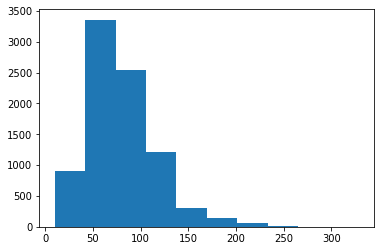

In [31]:
# 각 데이터의 토큰 개수 시각화 - histplot
import matplotlib.pyplot as plt

plt.hist(temp)
plt.show()

In [32]:
print(f'MAX_LENGTH = 200 일때: {np.array([True if x <= 200 else False for x in temp]).sum() / len(conversation) * 100:.2f} %')
print(f'MAX_LENGTH = 100 일때: {np.array([True if x <= 100 else False for x in temp]).sum() / len(conversation) * 100:.2f} %')
print(f'MAX_LENGTH = 50 일때: {np.array([True if x <= 50 else False for x in temp]).sum() / len(conversation) * 100:.2f} %')

MAX_LENGTH = 200 일때: 98.97 %
MAX_LENGTH = 100 일때: 75.78 %
MAX_LENGTH = 50 일때: 20.95 %


In [33]:
# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 200
print(MAX_LENGTH)

200


In [34]:
# 최대 길이를 초과하는 샘플은 데이터 자르기, 패딩
def tokenize_and_filter(inputs):
  tokenized_inputs = list()
  
  for sentence in inputs:
    # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
    sentence = tokenizer.encode(sentence)

    # 최대 길이 200 까지만 데이터셋으로 사용
    if len(sentence) <= MAX_LENGTH:
      tokenized_inputs.append(sentence)
    
    else:
      tokenized_inputs.append(sentence[:MAX_LENGTH])
  
  # 최대 길이 200으로 모든 데이터셋을 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs

In [35]:
conversation = tokenize_and_filter(conversation)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 대화 샘플 개수: {}'.format(len(conversation)))

단어장의 크기 : 2042
필터링 후의 대화 샘플 개수: 8543


# 모델링 - transformer 인코딩 모델 밑바닥부터 구현하기

In [36]:
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # 각도 배열 생성
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스에는 sin 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sin과 cosine이 교차되도록 재배열
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
  # 어텐션 가중치는 Q와 K의 닷 프로덕트
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 가중치를 정규화
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 패딩에 마스크 추가
  if mask is not None:
    logits += (mask * -1e9)

  # softmax적용
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # 최종 어텐션은 가중치와 V의 닷 프로덕트
  output = tf.matmul(attention_weights, value)
  return output

# 멀티 헤드 어텐션 구현하기
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Q, K, V에 각각 Dense를 적용합니다
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 병렬 연산을 위한 머리를 여러 개 만듭니다
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 스케일드 닷 프로덕트 어텐션 함수
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 최종 결과에도 Dense를 한 번 더 적용합니다
    outputs = self.dense(concat_attention)

    return outputs

# 패딩 마스크 구현 함수
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]

# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 두 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

# 인코더 생성하기
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layers만큼 쌓아올린 인코더의 층.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [37]:
# 인코더만 구성하기
def my_encoder(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="my_encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 인코더에서 패딩을 위한 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 인코더
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # Global Average Pooling 적용 (or Max Pooling 가능)
  outputs = tf.keras.layers.GlobalMaxPooling1D()(enc_outputs)

  # 완전연결층
  outputs = tf.keras.layers.Dense(256, activation="relu", name='dense1')(outputs)
#   outputs = tf.keras.layers.Dropout(0.3)(outputs)  # 🔥 드롭아웃 추가 (30%)
  outputs = tf.keras.layers.Dense(128, activation="relu", name='dense2')(outputs)
#   outputs = tf.keras.layers.Dropout(0.3)(outputs)  # 🔥 드롭아웃 추가 (30%)
  outputs = tf.keras.layers.Dense(units=5, activation="softmax", name='outputs')(outputs)

  return tf.keras.Model(inputs=inputs, outputs=outputs, name=name)

In [38]:
# 모델 생성하기
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 128 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = my_encoder(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "my_encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 128)    657920      inputs[0][0]                     
                                                                 enc_padding_mask[0][0]           
__________________________________________________________________________________________________
global_max_pooling1d (GlobalMax (None, 128)          0           encoder[0][0]           

In [39]:
# 커스텀 학습률 스케줄링(Custom Learning rate Scheduling)
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [40]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping & ModelCheckpoint 설정
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

model_checkpoint = ModelCheckpoint(
    "best_model", monitor='val_loss', save_best_only=True, mode='max', verbose=1, save_format="tf", save_weights_only=True)

callbacks = [early_stopping, model_checkpoint]


In [41]:
# 모델 컴파일
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

In [42]:
BATCH_SIZE = 64
BUFFER_SIZE = 10000

def get_dataset(data):
    conversation = data['conversation'].apply(preprocess_sentence)
    conversation = tokenize_and_filter(conversation)

    dataset = tf.data.Dataset.from_tensor_slices((
    {'inputs': conversation},  # 입력 데이터
    {'outputs': data['class_encoded'].values}  # 출력 데이터 (라벨)
    ))
    
    dataset = dataset.cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    
    return dataset

train_dataset = get_dataset(train_df)
val_dataset = get_dataset(val_df)
test_dataset = get_dataset(test_df)

Epoch 1/100
134/134 [==============================] - 10s 52ms/step - loss: 1.6240 - accuracy: 0.2650 - val_loss: 1.2989 - val_accuracy: 0.4898

Epoch 00001: val_loss improved from -inf to 1.29889, saving model to best_model
Epoch 2/100
134/134 [==============================] - 6s 48ms/step - loss: 1.3505 - accuracy: 0.3852 - val_loss: 1.0440 - val_accuracy: 0.5392

Epoch 00002: val_loss did not improve from 1.29889
Epoch 3/100
134/134 [==============================] - 6s 48ms/step - loss: 1.1074 - accuracy: 0.4886 - val_loss: 0.8292 - val_accuracy: 0.6399

Epoch 00003: val_loss did not improve from 1.29889
Epoch 4/100
134/134 [==============================] - 6s 48ms/step - loss: 0.7276 - accuracy: 0.7078 - val_loss: 0.4537 - val_accuracy: 0.8072

Epoch 00004: val_loss did not improve from 1.29889
Epoch 5/100
134/134 [==============================] - 7s 49ms/step - loss: 0.4212 - accuracy: 0.8429 - val_loss: 0.2496 - val_accuracy: 0.9044

Epoch 00005: val_loss did not improve fro

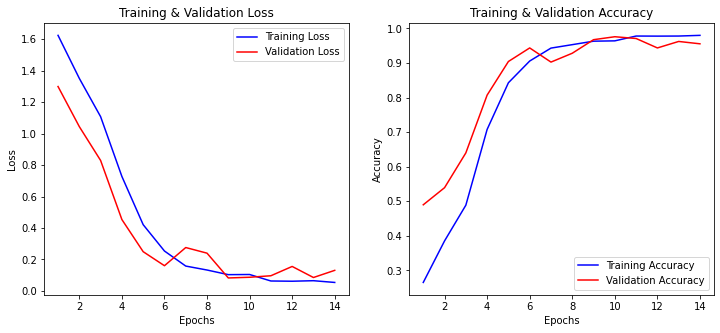

In [43]:
import matplotlib.pyplot as plt

# 모델 학습 실행 (history 저장)
EPOCHS = 100
history = model.fit(
    train_dataset, 
    validation_data=val_dataset, 
    epochs=EPOCHS, 
    callbacks=callbacks
)

# 학습 결과(history) 가져오기
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history.get('accuracy', history.history.get('acc'))  # 'accuracy' 또는 'acc' 키 확인
val_acc = history.history.get('val_accuracy', history.history.get('val_acc'))  # 'val_accuracy' 또는 'val_acc' 키 확인

# 에포크 값 생성
epochs = range(1, len(train_loss) + 1)

# Loss 그래프
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


In [44]:
# test_dataset에서 X, y 추출

# X와 y 리스트 생성
X_train = []
y_train = []

# test_dataset에서 inputs(X)와 outputs(y) 추출
for x, y in train_dataset:
    X_train.extend(x['inputs'].numpy())  # X 값 (입력 데이터)
    y_train.extend(y['outputs'].numpy())  # y 값 (라벨 데이터)

# 리스트를 NumPy 배열로 변환
X_train = np.array(X_train)
y_train = np.array(y_train)

pd.value_counts(y_train)


3    1808
2    1744
1    1737
4    1632
0    1622
dtype: int64

In [45]:
# test_dataset에서 X, y 추출

# X와 y 리스트 생성
X_val = []
y_val = []

# test_dataset에서 inputs(X)와 outputs(y) 추출
for x, y in val_dataset:
    X_val.extend(x['inputs'].numpy())  # X 값 (입력 데이터)
    y_val.extend(y['outputs'].numpy())  # y 값 (라벨 데이터)

# 리스트를 NumPy 배열로 변환
X_val = np.array(X_val)
y_val = np.array(y_val)

pd.value_counts(y_val)


4    189
3    120
1    103
2     91
0     83
dtype: int64

In [46]:
# test_dataset에서 X, y 추출

# X와 y 리스트 생성
X_test = []
y_test = []

# test_dataset에서 inputs(X)와 outputs(y) 추출
for x, y in test_dataset:
    X_test.extend(x['inputs'].numpy())  # X 값 (입력 데이터)
    y_test.extend(y['outputs'].numpy())  # y 값 (라벨 데이터)

# 리스트를 NumPy 배열로 변환
X_test = np.array(X_test)
y_test = np.array(y_test)

pd.value_counts(y_test)


4    202
1    106
2    105
3     94
0     79
dtype: int64

In [47]:
# X 데이터 합치기
temp = np.concatenate([X_train, X_val, X_test], axis=0)
temp.shape

(9715, 200)

In [48]:
# X 데이터 중복값 확인(데이터 누출 확인)
np.unique(temp, axis=0).shape

(9714, 200)

# Test dataset으로 확인하기

In [49]:
# 모델 평가 (train_dataset을 사용)
model.evaluate(train_dataset)

134/134 [==============================] - 3s 20ms/step - loss: 0.0202 - accuracy: 0.9952


[0.02024978958070278, 0.9952007532119751]

In [50]:
# 모델 평가 (validation_dataset을 사용)
model.evaluate(val_dataset)

10/10 [==============================] - 0s 18ms/step - loss: 0.0826 - accuracy: 0.9676


[0.08262895792722702, 0.967576801776886]

In [51]:
# 모델 평가 (test_dataset을 사용)
model.evaluate(test_dataset)

10/10 [==============================] - 0s 18ms/step - loss: 0.0724 - accuracy: 0.9778


[0.07243552058935165, 0.9778156876564026]

In [52]:
# test_dataset에서 X, y 추출

# X와 y 리스트 생성
X_test = []
y_test = []

# test_dataset에서 inputs(X)와 outputs(y) 추출
for x, y in test_dataset:
    X_test.extend(x['inputs'].numpy())  # X 값 (입력 데이터)
    y_test.extend(y['outputs'].numpy())  # y 값 (라벨 데이터)

# 리스트를 NumPy 배열로 변환
X_test = np.array(X_test)
y_test = np.array(y_test)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_test shape: (586, 200)
y_test shape: (586,)


In [53]:
def get_pred(X_test):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=-1)
    
    return y_pred

y_pred = get_pred(X_test)
y_pred[:5]

array([4, 3, 2, 4, 3])

In [54]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9390    0.9747    0.9565        79
           1     0.9904    0.9717    0.9810       106
           2     0.9901    0.9524    0.9709       105
           3     0.9388    0.9787    0.9583        94
           4     1.0000    0.9950    0.9975       202

    accuracy                         0.9778       586
   macro avg     0.9717    0.9745    0.9728       586
weighted avg     0.9784    0.9778    0.9779       586



# 추론 및 Submission 저장

In [55]:
def make_submission_df(model, test_df):
    test_conversation = test_df['text'].apply(preprocess_sentence)
    test_conversation = tokenize_and_filter(test_conversation)
    
    y_pred = get_pred(test_conversation)
    
    test_df['target'] = y_pred
    test_df.drop(['text'], axis=1, inplace=True)
    
    return test_df

test_df = load_data(test_path)
test_df = make_submission_df(model, test_df)
test_df.to_csv('my_submission.csv', index=False)
test_df.head()

,idx,target
0,t_000,0
1,t_001,2
2,t_002,2
3,t_003,3
4,t_004,1


In [56]:
test_df[5:10]

,idx,target
5,t_005,0
6,t_006,0
7,t_007,1
8,t_008,3
9,t_009,1


In [57]:
test_df['target'].value_counts()

3    152
2    117
0    116
1    105
4     10
Name: target, dtype: int64

In [58]:
test_df[test_df['target']==4]

,idx,target
11,t_011,4
16,t_016,4
57,t_057,4
93,t_093,4
102,t_102,4
167,t_167,4
217,t_217,4
225,t_225,4
267,t_267,4
473,t_473,4
